# Uvod u umjetnu inteligenciju
## Maksim Kos
Na skupu podataka *Urban Building Energy Stock Datasets* razviti:
1. deskriptivni model primjenom jednog algoritma nenadziranog učenja (klasteriranje) kojim će te grupirati objekte u optimalan broj grupa (klastera) temeljem sličnih karakteristika,
2. prediktivne modele primjenom jednog algoritma nadziranog statističkog ili strojnog učenja (linearna regresija ili SVM) kojim će te predviđati potrošnju, za svaku grupu objekata.

Izvor podataka: https://data.mendeley.com/datasets/m6vv9k9gcd/1

### 1. Dio - Razvoj deskriptivnog modela primjenom algoritma nenadziranog učenja

Na početku je potrebno uvesti sve *biblioteke* koje će se koristiti za rješavanje ovog zadatka:
- `pandas` biblioteka će se koristiti za dohvaćanje podataka iz .csv datoteke
- `matplotlib.pyplot` biblioteka će se koristiti za prikazivanje različitih vrsta grafova
- `seaborn` biblioteka će se koristiti za naprednu vizualizaciju podataka

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Nakon uvoza biblioteka, potrebno je preuzeti dani *dataset* i učitati ga u program koristeći `pandas` biblioteku.

In [2]:
data = pd.read_csv("urban_building_stock_datasets.csv")

In [3]:
# Prikaz prvih 5 redaka
data.head()

,Simple_Building_Energy_Rating,Weather_File,Building_Type,Renewable_Energy_Usage,Floor_Insulation_U-Value,Door_Insulation_U-Value,Roof_Insulation_U-Value,Window_Insulation_U-Value,Wall_Insulation_U-Value,Building_Energy_Rating,...,Water_Systems_Energy,Interior_Lighting_Energy,Interior_Equipment_Energy,Total_Heating_Energy,Photovoltaic_Power,Total_Electricity_Energy,Heating_Conversion_Factor,Electricity_Primary_Conversion_Factor,Heating_Primary_Conversion_Factor,Energy_Use_Intensity
0,D,2030,Semi Detached,Yes,0.55,3.98,2.13,0.73,1.50,D1,...,10381.33,1805.78,5008.06,16963.95,1202.389,5671.575,0.258,2.08,2.08,245.811562
1,G,Historical,Semi Detached,No,0.78,2.94,1.42,1.80,1.95,G,...,24223.11,1289.84,3443.04,10249.90,0.000,4732.887,0.542,2.08,2.08,452.297312
2,D,Historical,Semi Detached,No,0.50,3.00,0.20,5.75,0.10,D1,...,24223.11,1289.84,313.00,10610.99,0.000,1602.848,0.301,2.08,2.08,233.474391
3,F,Historical,Detached,No,0.25,2.19,0.84,5.01,1.03,F,...,1419.62,2879.78,4281.74,67484.33,0.000,7161.524,0.246,2.08,2.08,383.401445
4,D,2030,Terraced,Yes,0.30,3.98,1.92,2.60,1.50,D1,...,18145.46,1994.60,4794.45,3466.65,1197.173,5651.735,0.258,2.08,2.08,254.784387


In [4]:
# Prikaz zadnjih 5 redaka
data.tail()

,Simple_Building_Energy_Rating,Weather_File,Building_Type,Renewable_Energy_Usage,Floor_Insulation_U-Value,Door_Insulation_U-Value,Roof_Insulation_U-Value,Window_Insulation_U-Value,Wall_Insulation_U-Value,Building_Energy_Rating,...,Water_Systems_Energy,Interior_Lighting_Energy,Interior_Equipment_Energy,Total_Heating_Energy,Photovoltaic_Power,Total_Electricity_Energy,Heating_Conversion_Factor,Electricity_Primary_Conversion_Factor,Heating_Primary_Conversion_Factor,Energy_Use_Intensity
1030017,A,Historical,Semi Detached,Yes,0.15,1.01,0.07,0.73,0.3,A2,...,3460.44,1289.84,313.00,2777.57,963.467,687.554,0.246,2.08,2.08,42.919280
1030018,C,2030,Semi Detached,No,0.55,1.50,1.02,4.23,1.6,C3,...,3460.44,773.91,5008.06,12268.47,0.000,5781.969,0.319,2.08,2.08,208.588992
1030019,E,2030,Semi Detached,Yes,0.50,2.94,0.73,1.80,2.1,E1,...,24223.11,1289.84,313.00,18351.39,394.129,1228.426,0.339,2.08,2.08,302.491016
1030020,C,Historical,Semi Detached,No,0.55,2.19,1.22,0.91,0.1,C2,...,3460.44,1805.78,313.00,22279.33,0.000,2118.785,0.301,2.08,2.08,190.567687
1030021,A,2030,Terraced,Yes,0.15,0.81,0.10,0.91,0.3,A3,...,3629.09,1108.11,1797.92,1004.68,1197.173,1768.716,0.310,2.08,2.08,72.733844


In [5]:
# Prikaz osnovnih informacija o skupu podataka
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030022 entries, 0 to 1030021
Data columns (total 32 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Simple_Building_Energy_Rating          1030022 non-null  object 
 1   Weather_File                           1030022 non-null  object 
 2   Building_Type                          1030022 non-null  object 
 3   Renewable_Energy_Usage                 1030022 non-null  object 
 4   Floor_Insulation_U-Value               1030022 non-null  float64
 5   Door_Insulation_U-Value                1030022 non-null  float64
 6   Roof_Insulation_U-Value                1030022 non-null  float64
 7   Window_Insulation_U-Value              1030022 non-null  float64
 8   Wall_Insulation_U-Value                1030022 non-null  float64
 9   Building_Energy_Rating                 1030022 non-null  object 
 10  HVAC_Efficiency                        103

Na temelju prethodnog, može se vidjeti da DataFrame sadrži 1030022 redaka i 32 stupaca, što je jako velika količina podataka za analizu.\
Također, prikazani su tipovi podataka:
- *int64* -> diskretne numeričke varijable - cijeli brojevi
- *float64* -> kontinuirane numeričke varijable - decimalni brojevi
- *object* -> kategorijski podaci.

Također, svaki stupac ima 1030022 ne null vrijednosti stoga neće biti potrebno dodatno počistiti podatke.

#### Uklanjanje nepotrebnih varijabli

In [6]:
# Provjera dupliciranih redaka
duplikati = data.duplicated().sum()
print("Broj dupliciranih redaka:", duplikati)

Broj dupliciranih redaka: 0


Nema dupliciranih redaka stoga iste ne treba uklanjati 

#### Uklanjanje nepotrebnih stupaca

Kako bi se klasteriranje izvršilo učinkovito, potrebno je ukloniti stupce koji imaju iste vrijednosti za svaki redak, stupce koji su jako slični te stupce koji su previše različiti i ne doprinose razlikovanju između objekata.

Prvi takav stupac je stupac `Electricity_Primary_Conversion_Factor`.<br>Za svaki redak vrijednost je ista = 2.08, stoga je taj stupac potrebno izbrisati iz DataFrame-a

In [7]:
data['Electricity_Primary_Conversion_Factor'].head(100)

0     2.08
1     2.08
2     2.08
3     2.08
4     2.08
      ... 
95    2.08
96    2.08
97    2.08
98    2.08
99    2.08
Name: Electricity_Primary_Conversion_Factor, Length: 100, dtype: float64

In [8]:
data = data.drop(['Electricity_Primary_Conversion_Factor'], axis=1)

Druga varijabla koju je potrebno izbrisati je `Simple_Building_Energy_Rating`.<br>
Razlog k tomu je taj što postoji još jedna varijabla koja predstavlja istu svar ali na detaljniji način - `Building_Energy_Rating`<br>
Ova dva stupca su redudantna - bilo koji od ova dva stupca može biti zamijenjen drugim bez gubitka informacija

In [9]:
data[['Simple_Building_Energy_Rating', 'Building_Energy_Rating']].head(100)

,Simple_Building_Energy_Rating,Building_Energy_Rating
0,D,D1
1,G,G
2,D,D1
3,F,F
4,D,D1
...,...,...
95,E,E2
96,C,C3
97,D,D2
98,B,B2


Stoga će biti uklonjen stupac `Simple_Building_Energy_Rating`, jer `Building_Energy_Rating` sadrži detaljnije informacije, te ako zadržim ovaj jednostavniji, mogu izgubiti specifičnost podataka koja može biti važna za analizu.

In [9]:
data = data.drop(['Simple_Building_Energy_Rating'], axis=1)

In [10]:
data['Weather_File'].head(100)

0           2030
1     Historical
2     Historical
3     Historical
4           2030
         ...    
95    Historical
96          2030
97          2030
98    Historical
99          2030
Name: Weather_File, Length: 100, dtype: object

Stupac koji je također specifičan je stupac `Weather_File`. Stupac za milijun redaka ima samo dvije jedinstvene vrijednosti: *historical* ili *2030*.<br>
Trenutno ne mogu zaključiti što ove vrijednosti predstavljaju i jesu li bitne za klasteriranje, stoga ću ga ostaviti.

Odokativno, više nema potencijalnih stupaca koje bi se trebalo ukloniti.

In [11]:
# Provjera oblika skupa podataka nakon uklanjanja nepotrebnih varijabli
print(data.shape)

(1030022, 30)


#### Eksplorativna analiza podataka

##### Prikaz deskriptivne statistike o DataFrame-u

In [12]:
# Deskriptivna statistika za numeričke varijable
data.describe()

,Floor_Insulation_U-Value,Door_Insulation_U-Value,Roof_Insulation_U-Value,Window_Insulation_U-Value,Wall_Insulation_U-Value,HVAC_Efficiency,Domestic_Hot_Water_Usage,Building_Orientation,Lighting_Density,Occupancy_Level,...,Heating_Usage,Water_Systems_Energy,Interior_Lighting_Energy,Interior_Equipment_Energy,Total_Heating_Energy,Photovoltaic_Power,Total_Electricity_Energy,Heating_Conversion_Factor,Heating_Primary_Conversion_Factor,Energy_Use_Intensity
count,1.030022e+06,1.030022e+06,1.030022e+06,1.030022e+06,1.030022e+06,1.030022e+06,1.030022e+06,1.030022e+06,1.030022e+06,1.030022e+06,...,1.030022e+06,1.030022e+06,1.030022e+06,1.030022e+06,1.030022e+06,1.030022e+06,1.030022e+06,1.030022e+06,1.030022e+06,1.030022e+06
mean,3.749125e-01,2.283150e+00,8.764483e-01,2.437740e+00,1.029969e+00,2.839381e+00,1.647542e+00,1.248015e+02,4.577380e+00,3.520394e+00,...,1.839056e+04,5.956094e+03,1.146382e+03,3.066849e+03,1.243447e+04,5.183613e+02,3.720788e+03,6.474968e-01,1.871182e+00,2.413771e+02
std,2.807436e-01,1.412946e+00,7.306986e-01,1.584323e+00,7.612975e-01,1.320311e+00,1.153964e+00,1.118527e+02,2.746419e+00,1.707279e+00,...,1.353147e+04,7.825227e+03,7.239780e+02,2.209874e+03,1.282889e+04,4.717050e+02,2.549686e+03,6.756717e-01,4.012942e-01,1.480022e+02
min,1.500000e-01,8.100000e-01,7.000000e-02,7.300000e-01,1.000000e-01,3.000000e-01,5.000000e-01,0.000000e+00,1.000000e+00,1.000000e+00,...,2.065100e+02,2.028000e+02,2.079600e+02,2.439700e+02,0.000000e+00,0.000000e+00,-6.902600e+02,2.410000e-01,1.100000e+00,-9.432926e+00
25%,1.800000e-01,1.010000e+00,1.000000e-01,1.060000e+00,3.500000e-01,2.000000e+00,5.000000e-01,0.000000e+00,3.000000e+00,2.000000e+00,...,7.607517e+03,6.084100e+02,6.238900e+02,1.463840e+03,4.232962e+03,0.000000e+00,1.699715e+03,2.710000e-01,2.080000e+00,1.182615e+02
50%,3.000000e-01,2.190000e+00,7.300000e-01,2.030000e+00,9.000000e-01,3.200000e+00,1.500000e+00,9.000000e+01,5.000000e+00,4.000000e+00,...,1.483058e+04,1.419620e+03,1.039820e+03,2.683710e+03,8.133640e+03,4.902850e+02,3.349275e+03,3.390000e-01,2.080000e+00,2.241423e+02
75%,4.400000e-01,2.940000e+00,1.510000e+00,3.210000e+00,1.840000e+00,4.000000e+00,2.500000e+00,2.250000e+02,7.000000e+00,5.000000e+00,...,2.610385e+04,1.038133e+04,1.599880e+03,4.794450e+03,1.525655e+04,9.634040e+02,5.465040e+03,5.420000e-01,2.080000e+00,3.317553e+02
max,1.600000e+00,5.700000e+00,2.280000e+00,5.750000e+00,2.400000e+00,4.500000e+00,3.500000e+00,3.150000e+02,9.000000e+00,6.000000e+00,...,1.073613e+05,2.540365e+04,2.879780e+03,8.174230e+03,1.067529e+05,1.233250e+03,1.105402e+04,3.613000e+00,2.080000e+00,6.499996e+02


In [13]:
# Deskriptivna statistika za kategorijske varijable
data.describe(include='object')

,Weather_File,Building_Type,Renewable_Energy_Usage,Building_Energy_Rating
count,1030022,1030022,1030022,1030022
unique,2,4,2,15
top,Historical,Bungalow,Yes,G
freq,517856,277851,623299,108117


##### Vizualizacija

Varijable možemo vizualizirati pomoću Histograma (numeričke varijable), stupčastih dijagrama (kategorijske varijable) te matrice korelacija (numeričke varijable). Vizualizacijom se mogu dodatno utvrditi varijable koje nisu potrebne za modeliranje.<br><br>
Odnos numeričkih varijabli može se prikazati histogramima, box-plotovima te matricom korelacija. Ja ću koristiti matricu korelacije za prikaz odnosa jer ona najbolje prikazuje povezanost svih numeričkih varijabli. 

Primjer histograma za numeričku varijablu

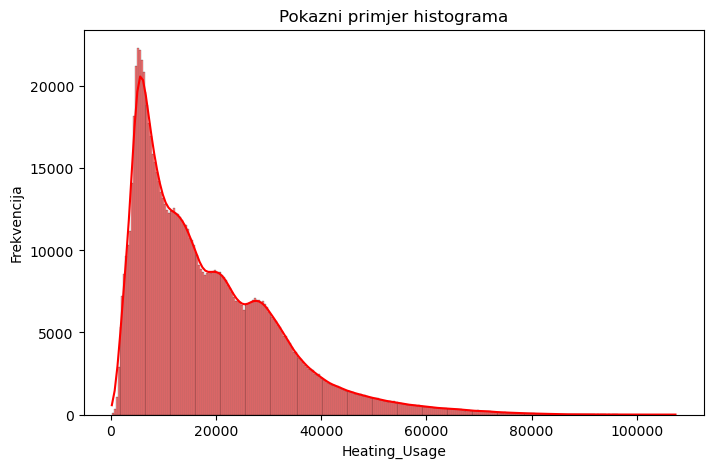

In [15]:
num_varijabla = data['Heating_Usage']

plt.figure(figsize=(8, 5))
sns.histplot(num_varijabla, kde=True, color='red')
plt.xlabel('Heating_Usage')
plt.ylabel('Frekvencija')
plt.title('Pokazni primjer histograma')
plt.show()

X-OS -> vrijednosti varijable<br>
Y-OS -> Predstavlja broj redaka (zapisa) u datasetu<br>
Na temelju histograma vidimo da većina vrijednosti varijable ima niže vrijednosti s najvećom frekvencijom od oko 0-20000, dok manje vrijednosti prelaze 40000.
<br>Ovo znači da veće vrijednosti imaju manji broj zapisa, a manje vrijednosti veći broj zapisa.

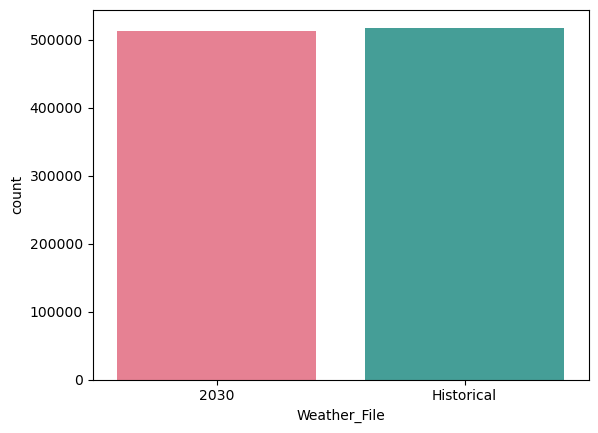

In [17]:
# Distribucija kategorijske varijable 'Weather_File' kroz stupčasti dijagram
sns.countplot(x='Weather_File', data=data, hue='Weather_File', palette='husl')
plt.show()

Na temelju supčastog dijagrama, vidljivo je da su vrijednosti `2030` i `Historical` u kategoriskoj varijabli `Weather_File` ravnomjerno raspoređene, stoga ovu varijablu nije potrebno uklanjati.

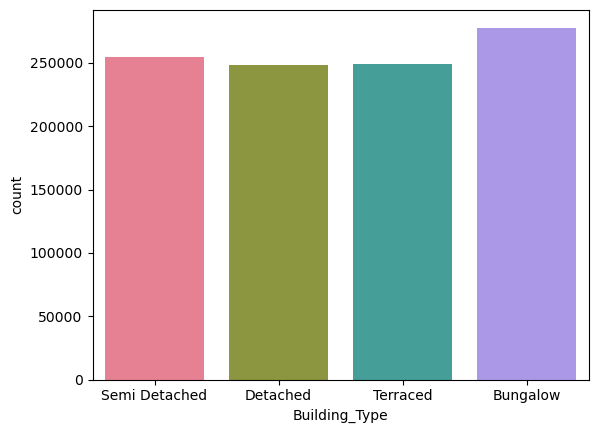

In [18]:
# Distribucija kategorijske varijable 'Building_Type' kroz stupčasti dijagram
sns.countplot(x='Building_Type', data=data, hue='Building_Type', palette='husl')
plt.show()

Vrijednosti za različite tipove zgrada su ravnomjerno raspoređene - slične frekvencije za sve kategorije

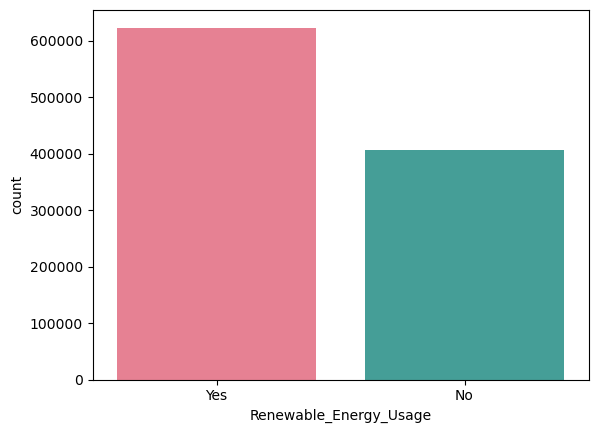

In [19]:
# Distribucija kategorijske varijable 'Renewable_Energy_Usage' kroz stupčasti dijagram
sns.countplot(x='Renewable_Energy_Usage', data=data, hue='Renewable_Energy_Usage', palette='husl')
plt.show()

Veći broj zgrada koristi obnovljive izvore energije u usporedbi s onima koje ih ne koriste.

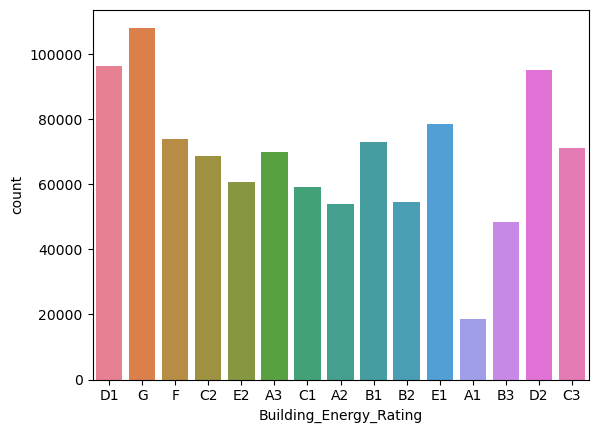

In [20]:
# Distribucija kategorijske varijable 'Building_Energy_Rating' kroz stupčasti dijagram
sns.countplot(x='Building_Energy_Rating', data=data, hue='Building_Energy_Rating', palette='husl')
plt.show()

Zgrade sa energetskim razredima G, D1 i D2 imaju najveći broj zapisa, dok razred A1 ima najmanji broj.

#### Matrica korelacije

<Axes: >

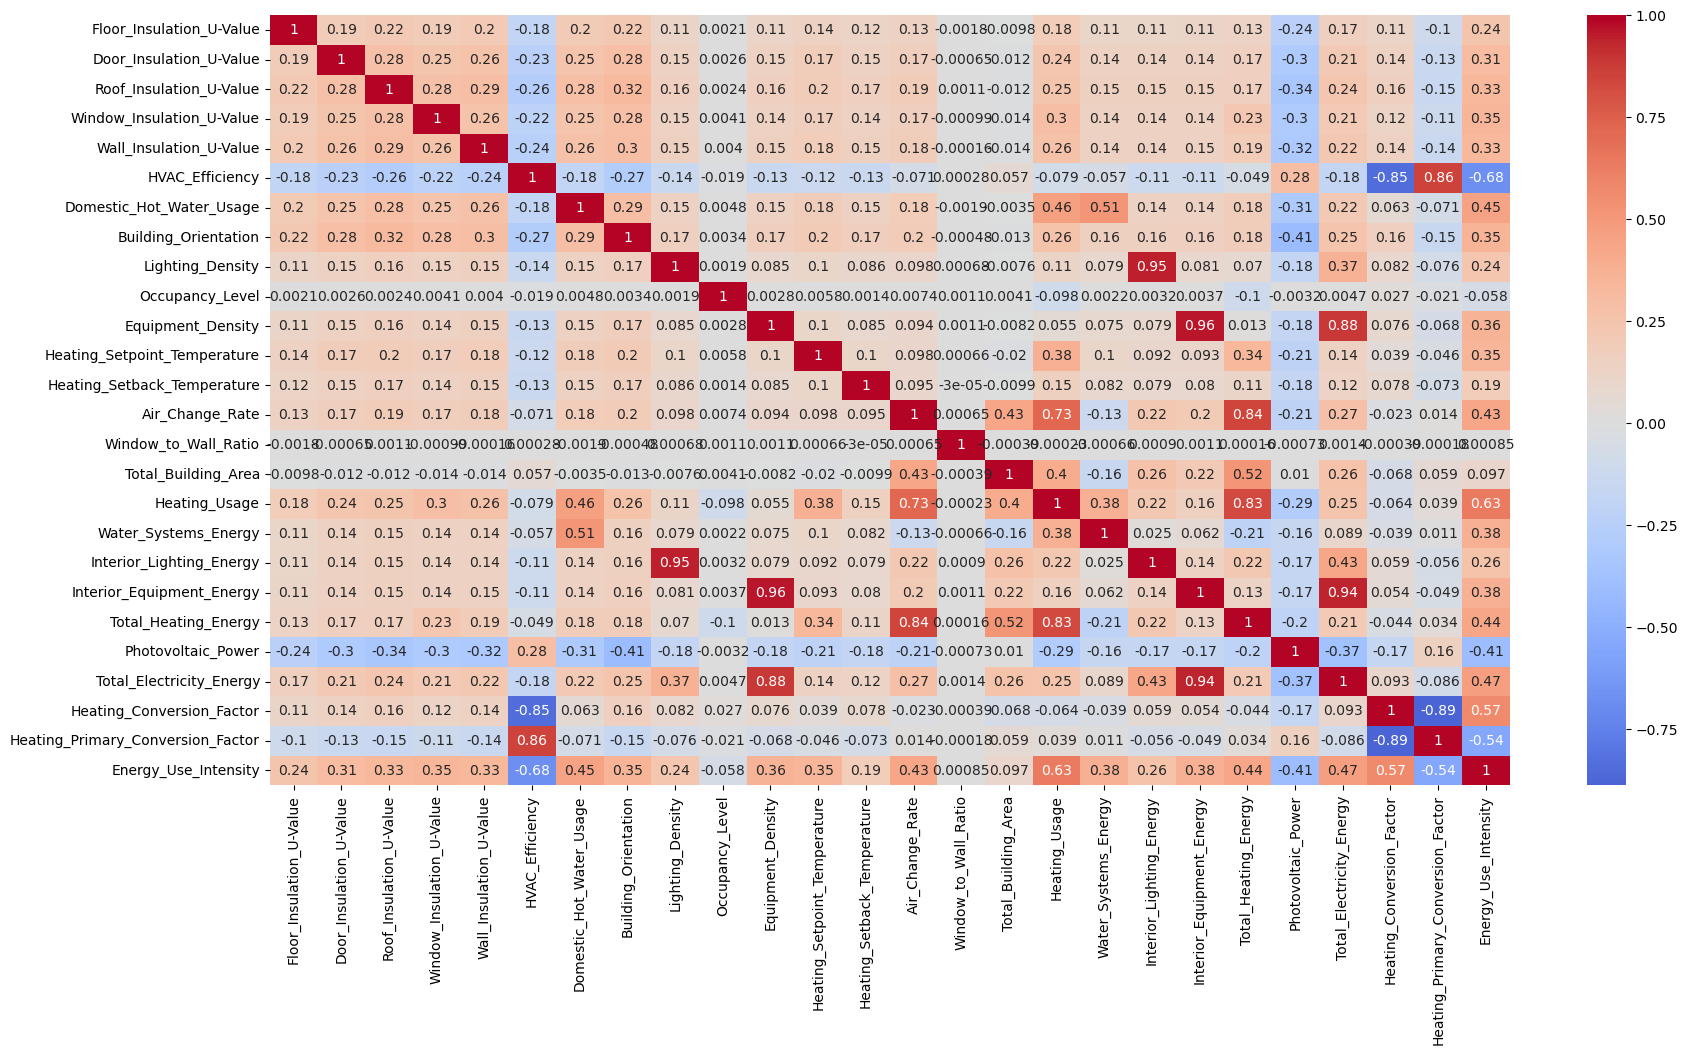

In [21]:
# Prikaz korelacije između numeričkih varijabli u skupu podataka pomoću toplinske karte
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)

Stupci koji imaju jako slabu korelaciju sa drugim stupcima su stupci `Occupany_Level` i `Window_to_Wall_Ratio`, te bi njih trebalo maknuti iz DataFrame-a kako bi se poboljšalo modeliranje i učinkovitost algoritma za klasteriranje.

In [22]:
data = data.drop(['Window_to_Wall_Ratio'], axis=1)

In [23]:
data = data.drop(['Occupancy_Level'], axis=1)

Sada kada su sve nepotrebne varijable uklonjene, možemo krenuti sa razvojem modela pomoću K-sredine

### Razvoj modela pomoću K-sredina
#### Priprema podataka za deskriptivno modeliranje

Kako bi se podaci pravilno pripremili za klasteriranje, potrebno ih je pripremiti na sljedeći način:
- Numeričke varijable će se skalirati kako bi se ujednačile značajnosti
- Kategorijske varijable će se kodirati

In [24]:
# Skaliranje numeričkih varijabli i kodiranje kategorijskih varijabli
from sklearn.preprocessing import StandardScaler

num_varijable = data.select_dtypes(include=['int64', 'float64']).columns
kat_varijable = data.select_dtypes(include=['object']).columns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[num_varijable])
scaled_df = pd.DataFrame(scaled_data, columns=num_varijable)

encoded_df = pd.get_dummies(data[kat_varijable], dtype=int)

final_df = pd.concat([scaled_df, encoded_df], axis=1)

print(final_df.head())

   Floor_Insulation_U-Value  Door_Insulation_U-Value  Roof_Insulation_U-Value  \
0                  0.623657                 1.200931                 1.715553   
1                  1.442910                 0.464880                 0.743880   
2                  0.445558                 0.507344                -0.925756   
3                 -0.444935                -0.065926                -0.049882   
4                 -0.266836                 1.200931                 1.428157   

   Window_Insulation_U-Value  Wall_Insulation_U-Value  HVAC_Efficiency  \
0                  -1.077899                 0.617408         1.030529   
1                  -0.402532                 1.208505        -0.635745   
2                   2.090649                -1.221558         0.576091   
3                   1.623572                 0.000041         1.182009   
4                   0.102416                 0.617408         1.030529   

   Domestic_Hot_Water_Usage  Building_Orientation  Lighting_Density 

Sada imamo pripremljen skup podataka za modeliranje
- Numeričke varijable su skalirane
- Kategorijske varijable su kodirane
- Svi podaci su spojeni u jedan DataFrame -> `final_df`

#### Modeliranje i evaluacija

Za modeliranje i evaluaciju koristit će se metoda lakta i metoda prosječne siluete kako bi se odredio optimalan broj klastera za K-sredine algoritam. Metoda lakta pomoći će vizualizirati inerciju, dok će prosječna silueta procijeniti koliko su klasteri dobro definirani.

##### Metoda lakta

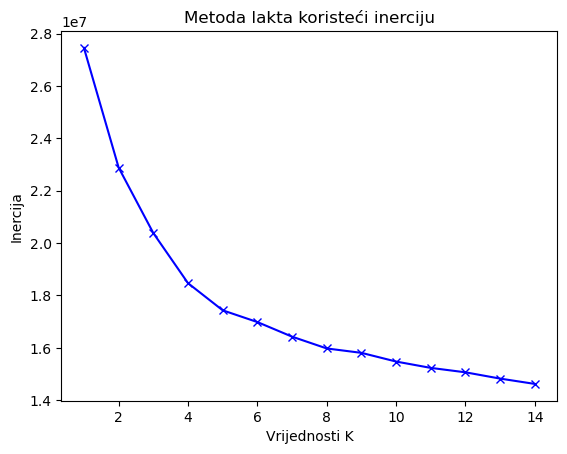

In [25]:
# Metoda lakta za odabir parametra K
from sklearn.cluster import KMeans
inertia = []
range_val = range(1, 15)

for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit(final_df)
    inertia.append(kmean.inertia_)

# Prikaz grafa metode lakta
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Vrijednosti K')
plt.ylabel('Inercija')
plt.title('Metoda lakta koristeći inerciju')
plt.show()

Iz gornjeg grafa vidimo da je nekoliko potencijalnih vrijdnosti K koje su vrijedne isprobavanja:
- K = 3
- K = 4
- K = 5
- K = 6

K=4 i K=5 imaju najveći potencijal jer predstavljaju *točke lakta*

##### Izrada i evaluacija modela za različite K

Najprije je potrebno smanjidi DataFrame `final_df` kako bi proces modeliranja i evaluacije trajao kraće.

In [26]:
manji_df = final_df.sample(n=100000, random_state=123)

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = range(3, 7)

silhouette_scores = []

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=101)
    kmeans_clusters = kmeans_model.fit_predict(manji_df)

    silhouette_avg = silhouette_score(manji_df, kmeans_clusters)
    silhouette_scores.append(silhouette_avg)

    print(f"K={k}: Silhouette Score={silhouette_avg:.4f}")

K=3: Silhouette Score=0.1599
K=4: Silhouette Score=0.1788
K=5: Silhouette Score=0.1670
K=6: Silhouette Score=0.1629


**Najveći rezultat za K je 4, što znači da je podjela na 4 klastera optimalna za ovaj skup podataka**

Sada bih htio pogledati koliko je objekata u kojem klasteru, te mi je ovdje pomogao ChatGPT!

*"Kada je klasteriranje završilo, te kada sam dobio optimalan broj klastera, kako bih mogao vidjeti koliko je objekata u kojim klasterima?"* - **JA**

*"Nakon što je klasteriranje završeno i dobili ste optimalan broj klastera, možete vidjeti koliko je objekata u svakom klasteru koristeći value_counts() na rezultatima klasteriranja. Pretpostavimo da ste koristili fit_predict i pohranili rezultate klasteriranja u varijablu kmeans_clusters. Sljedeći korak bi izgledao ovako:"* - **ChatGPT**

In [32]:
# Pretpostavimo da je optimalan broj klastera određen kao 4
optimal_k = 4

# Izrada K-means modela za optimalan broj klastera
kmeans_model = KMeans(n_clusters=optimal_k, random_state=101)
kmeans_clusters = kmeans_model.fit_predict(manji_df)

# Pretvaranje rezultata klasteriranja u Pandas Series
clusters = pd.Series(kmeans_clusters)

# Brojanje objekata u svakom klasteru
print("Distribucija objekata po klasterima:")
print(clusters.value_counts())


Distribucija objekata po klasterima:
1    45812
0    22729
2    20101
3    11358
Name: count, dtype: int64


### 2. Dio zadatka

Za drugi dio zadatka, potrebno je razviti prediktivi model primjenom jednog algoritma nadziranog statističko ili strojnog učenja. Ja sam odabrao SVM, točnije metodu potpornih vektora, pomoću koje ću napraviti predviđanje potrošnje, za svaku grupu objekata

### **Razvoj modela SVM**

#### Razdvajanje X (nezavisnih varijabli) i y (zavisne (ciljne) varijable)

In [33]:
X = manji_df.drop(columns=['Energy_Use_Intensity'])
y = manji_df['Energy_Use_Intensity']

y = pd.qcut(y, q=5, labels=[1, 2, 3, 4, 5])  # Podjela u ciljne varijable u 5 kategorija

**X (nezavisne varijable)** predstavlja ulazne značajke koje se koriste za predviđanje ciljne varijable. Njih će model koristi za donošenje predikcija.<br> 
**y (zavisna / ciljna varijabla)** predstavlja varijablu koju pokušavamo predvidjeti pomoću modela<br><br>
Za zavisnu varijablu odabran je `Energy_Use_Intensity`, jer se u zadatku traži da je potrebno predviđati potrošnju, a ova varijabla predstavlja količinu energije koja se koristi. 

Imao sam problema s treniranjem modela dok nisam zatražio pomoć od ChatGPT-a. On mi je popravio pogrešku na taj način da je podijelio ciljnu varijablu na 5 kategorija. Nije mi bilo jasno koji je razlog k tomu pa sam ga pitao sljedeće:

*"Zašto je podjela ciljne varijable u kategorije potrebna?"* - **JA**

*"Podjela ciljne varijable u kategorije nužna je kako bi se kontinuirane vrijednosti energije pretvorile u diskretne klase. Ovo omogućuje korištenje algoritma klasifikacije, poput SVM-a, koji bolje funkcionira s diskretnim klasama nego s kontinuiranim vrijednostima. Na ovaj način model može grupirati objekte u jasne kategorije (jako mala, mala, srednja, velika, jako velika potrošnja) te olakšati analizu i interpretaciju rezultata."* - **ChatGPT**

#### Podjela skupa podataka u skup za treniranje i testiranje

In [34]:
from sklearn.model_selection import train_test_split # Uvoz funkcije train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=101)

#### Razvoj modela SVC

Nije mi bilo jasno što je SVC ako u zadatku piše da moramo napraviti model SVM, stoga sam pitao ChatGPT da mi objasni:

*"Što je model SVC u kontekstu modela SVM. Odgovori mi jednom rečenicom ukratko!"* - **JA**

*"Model SVC je implementacija algoritma SVM koja se koristi za klasifikacijske zadatke i omogućuje treniranje i predviđanje na temelju podataka"* - **ChatGPT**

In [35]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#### Evaluacija modela

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
# Ispis matrice konfuzije
print(confusion_matrix(y_test,y_pred))

[[4019    0    0    0    0]
 [ 202 3683  196    0    0]
 [   0   98 3803   75    0]
 [   0    0    0 3987    4]
 [   0    0    0  392 3541]]


Matrica konfuzije pokazuje rezultate SVM modela s pet klasa. Svaki redak u matrici predstavlja stvarnu klasu, dok svaki stupac predstavlja predviđenu klasu.

In [39]:
# Ispis izvješća
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      1.00      0.98      4019
           2       0.97      0.90      0.94      4081
           3       0.95      0.96      0.95      3976
           4       0.90      1.00      0.94      3991
           5       1.00      0.90      0.95      3933

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



Sa ispisa izvješća možemo vidjeti kako je točnost na visokih 95%. Također, prezisnost za svaku klasu je visoka (95% ili više).

In [40]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Provjera rezultata
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred))

Accuracy: 0.95165
Balanced accuracy: 0.951658419724159


Model ima vrlo visoku točnost (95%), te bih mogao sa sigurnošču reći da je model uspješno istreniran i napravljen.

### Poboljšanje modela

#### Skaliranje numeričkih varijabli

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

#### Razvoj modela koristeći skalirane varijable

In [43]:
# Treniranje modela
model.fit(X_train_scaled, y_train)
y_pred2 = model.predict(X_test_scaled)

In [44]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           1       0.95      1.00      0.98      4019
           2       0.96      0.90      0.93      4081
           3       0.94      0.94      0.94      3976
           4       0.89      1.00      0.94      3991
           5       1.00      0.89      0.94      3933

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [45]:
# Provjera rezultata
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred2))

Accuracy: 0.9468
Balanced accuracy: 0.9467975681995903


Rezultati pokazuju da je početna točnost bez skaliranja numeričkih varijabli veća od točnosti sa modela sa skaliranim varijablama. Stoga pretpostavljam da skaliranje varijabli nije potrebno u ovom skupu podataka.